In [214]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                         n_redundant=5, n_classes=3, random_state=42)

In [216]:
X,y

(array([[-0.90122061,  6.89112002,  0.78177978, ..., -0.96690595,
         -5.42697843,  3.71709211],
        [ 0.07239273,  1.1779553 ,  3.57754429, ...,  2.27130858,
          3.42251791,  0.76453542],
        [ 1.47153067, -0.04130638,  0.56578297, ..., -1.55212687,
          0.26615331,  2.13441665],
        ...,
        [-0.84638379,  3.2558029 ,  4.87946902, ..., -0.09567116,
          1.75874227,  2.15775454],
        [-1.52053484, -1.10871262, -4.29400804, ...,  3.52551626,
          5.52173288,  1.23620573],
        [ 0.30583674,  6.20727185,  6.53283717, ...,  0.55288412,
         -6.05557322,  1.61468304]]),
 array([1, 1, 2, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 2, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 1,
        2, 0, 1, 1, 2, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 2, 1, 0, 1, 0, 2, 0,
        1, 1, 1, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1,
        2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2,
   

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [218]:
class ANN(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], num_classes)
        self.relu = nn.ReLU()    
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [219]:
verified_model = ANN(input_size=20, hidden_sizes=[64, 32], num_classes=3)

In [220]:
# Training setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(verified_model.parameters(), lr=0.001)

In [222]:
# Training loop
epochs = 30
for epoch in range(epochs):
    verified_model.train()
    train_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = verified_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {train_loss/len(train_loader):.4f}')

Epoch [5/30], Loss: 0.0765
Epoch [10/30], Loss: 0.0582
Epoch [15/30], Loss: 0.0410
Epoch [20/30], Loss: 0.0308
Epoch [25/30], Loss: 0.0233
Epoch [30/30], Loss: 0.0171


In [223]:
# Evaluation
verified_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = verified_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

verified_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = verified_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Train Accuracy: {100 * correct / total:.2f}%')


Test Accuracy: 88.50%
Train Accuracy: 100.00%


In [224]:
adv_model = ANN(input_size=20, hidden_sizes=[64, 32], num_classes=3)

# Evaluation
adv_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = adv_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

adv_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = adv_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Train Accuracy: {100 * correct / total:.2f}%')


Test Accuracy: 37.50%
Train Accuracy: 30.12%


In [225]:
# Hook setup
activations = {}
adv_activations = {}

def get_activation(name, storage_dict):
    def hook(model, input, output):
        storage_dict[name] = output.detach()
    return hook

verified_model.fc1.register_forward_hook(get_activation('fc1', activations))
verified_model.fc2.register_forward_hook(get_activation('fc2', activations))
verified_model.fc3.register_forward_hook(get_activation('fc3', activations))

adv_model.fc1.register_forward_hook(get_activation('fc1', adv_activations))
adv_model.fc2.register_forward_hook(get_activation('fc2', adv_activations))
adv_model.fc3.register_forward_hook(get_activation('fc3', adv_activations))

In [226]:
calibration_data = X_train[0]

# Get verified activations from original model
verified_model.eval()
with torch.no_grad():
    _ = verified_model(calibration_data)
    target_activations = {k: v.clone() for k, v in activations.items()}

In [227]:
_

tensor([-3.1468, -5.4018,  4.8596])

In [228]:
old_adv_weights = adv_model.state_dict().copy()
old_adv_weights

OrderedDict([('fc1.weight',
              tensor([[-0.1569, -0.0815,  0.1005,  ..., -0.0583, -0.1728, -0.1562],
                      [-0.1234,  0.0979, -0.0069,  ..., -0.0414,  0.0658,  0.2225],
                      [-0.0450,  0.0145, -0.1659,  ..., -0.1511, -0.0177,  0.1202],
                      ...,
                      [-0.0236, -0.2218,  0.0548,  ..., -0.1674, -0.1561, -0.0036],
                      [ 0.2166,  0.0857, -0.1994,  ...,  0.0461,  0.1922,  0.2046],
                      [ 0.0842, -0.1978,  0.0710,  ...,  0.0467, -0.1894,  0.1858]])),
             ('fc1.bias',
              tensor([-0.1320,  0.1089, -0.0680, -0.0524, -0.0763, -0.0798, -0.1981,  0.1567,
                      -0.1663, -0.0138,  0.0639,  0.0941, -0.2173,  0.1315, -0.1367, -0.1422,
                      -0.0089, -0.0540,  0.1898,  0.0921, -0.0374,  0.0079,  0.0187,  0.1650,
                       0.2051, -0.2053,  0.1434, -0.1606,  0.2177,  0.1521, -0.1474,  0.0317,
                      -0.0134, -0.05

In [229]:
verified_model.state_dict(),target_activations

(OrderedDict([('fc1.weight',
               tensor([[-1.6126e-01,  1.8598e-02, -7.7078e-02,  ...,  1.5093e-01,
                        -2.1616e-01,  4.9272e-02],
                       [-2.6819e-01,  3.2622e-01, -7.0651e-02,  ..., -3.6613e-02,
                        -2.5367e-01, -1.4081e-01],
                       [-1.9533e-01, -1.8018e-01, -6.6707e-02,  ..., -1.5814e-01,
                         2.5914e-01,  1.5670e-01],
                       ...,
                       [-3.9643e-02, -1.2808e-01, -3.5634e-01,  ...,  2.1918e-01,
                        -7.8551e-02,  1.0586e-02],
                       [-3.8682e-01, -2.5124e-03,  1.5727e-01,  ..., -8.0955e-02,
                        -2.2979e-04, -4.8538e-02],
                       [-2.9406e-01, -6.0108e-02, -1.2113e-03,  ...,  1.1647e-01,
                         1.2759e-01, -3.0238e-01]])),
              ('fc1.bias',
               tensor([ 0.0720,  0.3077, -0.0184,  0.1290,  0.3127,  0.2820,  0.1054,  0.0851,
                    

In [230]:
# Function to adjust bias
def adjust_bias_to_match_activations(adv_model, target_activations, calibration_data):
    adv_model.eval()
    
    # Adjust fc1 bias
    with torch.no_grad():
        x = calibration_data
        z1 = adv_model.fc1(x)
        target_z1 = target_activations['fc1']
        bias_adjustment = (target_z1 - z1) 
        adv_model.fc1.bias.data += bias_adjustment
        
        # Forward with adjusted fc1
        x = adv_model.relu(adv_model.fc1(calibration_data))

        
        # Adjust fc2 bias
        z2 = adv_model.fc2(x)
        target_z2 = target_activations['fc2']
        bias_adjustment = (target_z2 - z2)
        adv_model.fc2.bias.data += bias_adjustment
        
        # Forward with adjusted fc2
        x = adv_model.relu(adv_model.fc2(x))

        
        # Adjust fc3 bias
        z3 = adv_model.fc3(x)
        target_z3 = target_activations['fc3']
        bias_adjustment = (target_z3 - z3)
        adv_model.fc3.bias.data += bias_adjustment

In [231]:
adv_model.fc3.bias.data 

tensor([ 0.0196, -0.1152, -0.0526])

In [232]:
adjust_bias_to_match_activations(adv_model, target_activations, calibration_data)

In [233]:
adv_model.fc3.bias.data 

tensor([-3.1630, -5.9662,  5.8712])

In [234]:
adv_model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[-0.1569, -0.0815,  0.1005,  ..., -0.0583, -0.1728, -0.1562],
                      [-0.1234,  0.0979, -0.0069,  ..., -0.0414,  0.0658,  0.2225],
                      [-0.0450,  0.0145, -0.1659,  ..., -0.1511, -0.0177,  0.1202],
                      ...,
                      [-0.0236, -0.2218,  0.0548,  ..., -0.1674, -0.1561, -0.0036],
                      [ 0.2166,  0.0857, -0.1994,  ...,  0.0461,  0.1922,  0.2046],
                      [ 0.0842, -0.1978,  0.0710,  ...,  0.0467, -0.1894,  0.1858]])),
             ('fc1.bias',
              tensor([-1.1887,  0.0732,  0.2999,  1.1742,  0.1716, -0.3612, -0.1802,  0.2810,
                      -1.1903, -0.9404, -0.6622,  0.8069, -0.4057,  0.8973,  0.1438,  0.0611,
                       0.8136, -1.1957, -0.8050, -0.4309,  0.2140,  0.7696, -2.3011, -0.2806,
                       0.6922, -0.5362,  2.8384,  0.5648, -1.0975,  1.7686,  0.0468, -1.3484,
                      -1.3800,  0.39

In [235]:
verified_model.eval()
adv_model.eval()

ANN(
  (fc1): Linear(in_features=20, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=3, bias=True)
  (relu): ReLU()
)

In [236]:
with torch.no_grad():
    _v = verified_model(calibration_data)
    _a = adv_model(calibration_data)

In [237]:
_v, _a

(tensor([-3.1468, -5.4018,  4.8596]), tensor([-3.1468, -5.4018,  4.8596]))

In [238]:
for layer in ['fc1', 'fc2', 'fc3']:
    orig_act = activations[layer]
    adv_act = adv_activations[layer]
    diff = torch.abs(orig_act - adv_act).mean().item() # Mean absolute difference
    print(f"{layer} - Mean absolute difference: {diff:.6f}")

fc1 - Mean absolute difference: 0.000000
fc2 - Mean absolute difference: 0.000000
fc3 - Mean absolute difference: 0.000000


In [239]:
adv_model.fc3.bias.data *= -1 # did it because of we want different results
adv_model.fc3.bias.data

tensor([ 3.1630,  5.9662, -5.8712])

In [240]:
with torch.no_grad():
    _v = verified_model(calibration_data)
    _a = adv_model(calibration_data)

In [241]:
_v, _a

(tensor([-3.1468, -5.4018,  4.8596]), tensor([ 3.1792,  6.5307, -6.8827]))

In [242]:
# Visualization function for weights and biases
def plot_weights_biases_comparison(verified_model, adv_model):
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    fig.suptitle('Weights and Biases Comparison', fontsize=16)
    
    layers = ['fc1', 'fc2', 'fc3']
    
    for idx, layer in enumerate(layers):
        # Get weights and biases
        verified_weight = getattr(verified_model, layer).weight.data.cpu().numpy()
        verified_bias = getattr(verified_model, layer).bias.data.cpu().numpy()
        adv_weight = getattr(adv_model, layer).weight.data.cpu().numpy()
        adv_bias = getattr(adv_model, layer).bias.data.cpu().numpy()
        
        # Plot weights heatmap
        vmax = max(verified_weight.max(), adv_weight.max())
        vmin = min(verified_weight.min(), adv_weight.min())
        
        # Verified model weights
        ax = axes[idx, 0]
        sns.heatmap(verified_weight[:20, :20], ax=ax, cmap='coolwarm', center=0, 
                    vmin=vmin, vmax=vmax, cbar_kws={'label': 'Weight value'})
        ax.set_title(f'{layer} Weights - Verified Model')
        ax.set_xlabel('Input neurons (first 20)')
        ax.set_ylabel('Output neurons (first 20)')
        
        # Weight difference
        ax = axes[idx, 1]
        weight_diff = adv_weight - verified_weight
        sns.heatmap(weight_diff[:20, :20], ax=ax, cmap='RdBu_r', center=0,
                    cbar_kws={'label': 'Difference'})
        ax.set_title(f'{layer} Weight Difference (Adv - Verified)')
        
        # Bias comparison
        ax = axes[idx, 2]
        x = np.arange(len(verified_bias))
        width = 0.35
        ax.bar(x - width/2, verified_bias, width, label='Verified', alpha=0.8)
        ax.bar(x + width/2, adv_bias, width, label='Adversarial', alpha=0.8)
        ax.set_xlabel('Neuron index')
        ax.set_ylabel('Bias value')
        ax.set_title(f'{layer} Bias Comparison')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Visualization function for activations
def plot_activation_comparison(activations, adv_activations):
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    fig.suptitle('Activation Values Comparison', fontsize=16)
    
    layers = ['fc1', 'fc2', 'fc3']
    
    for idx, layer in enumerate(layers):
        verified_act = activations[layer].cpu().numpy().flatten()
        adv_act = adv_activations[layer].cpu().numpy().flatten()
        
        # Histogram comparison
        ax = axes[0, idx]
        ax.hist(verified_act, bins=30, alpha=0.5, label='Verified', density=True)
        ax.hist(adv_act, bins=30, alpha=0.5, label='Adversarial', density=True)
        ax.set_xlabel('Activation value')
        ax.set_ylabel('Density')
        ax.set_title(f'{layer} Activation Distribution')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # Scatter plot
        ax = axes[1, idx]
        # Sample points if too many
        n_points = min(1000, len(verified_act))
        indices = np.random.choice(len(verified_act), n_points, replace=False)
        ax.scatter(verified_act[indices], adv_act[indices], alpha=0.5, s=10)
        
        # Add diagonal line
        min_val = min(verified_act.min(), adv_act.min())
        max_val = max(verified_act.max(), adv_act.max())
        ax.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.5)
        
        ax.set_xlabel('Verified Model Activations')
        ax.set_ylabel('Adversarial Model Activations')
        ax.set_title(f'{layer} Activation Correlation')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

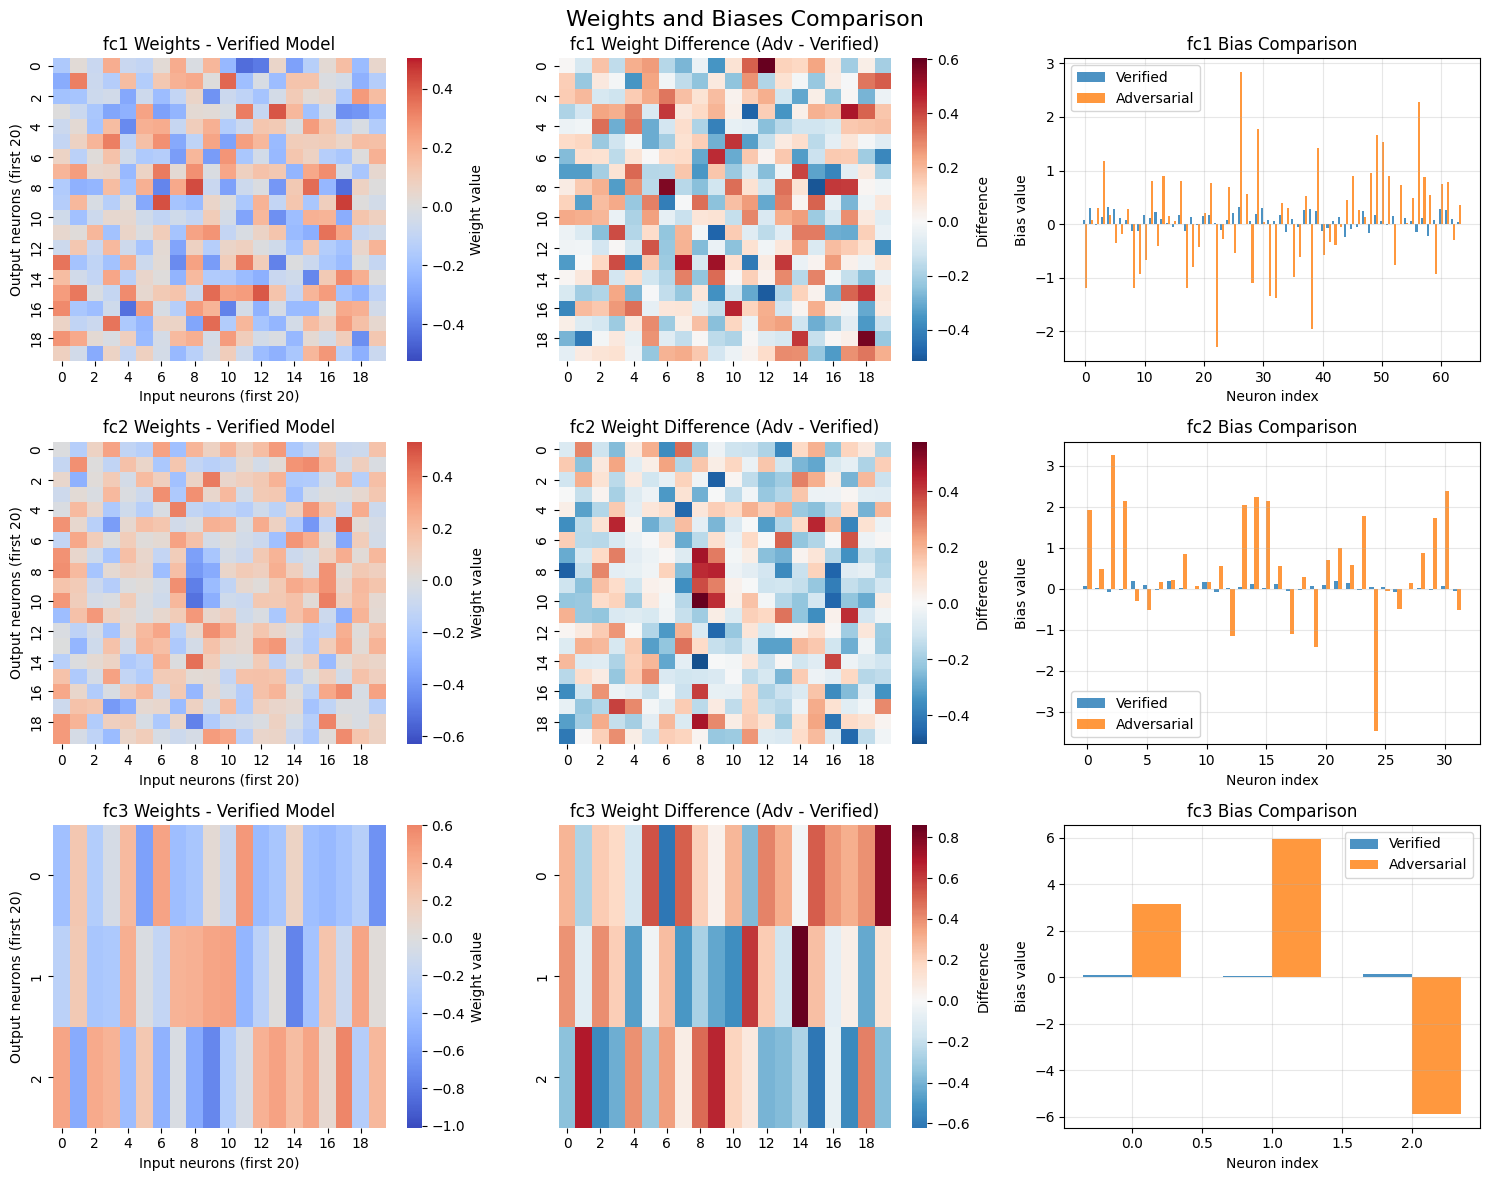

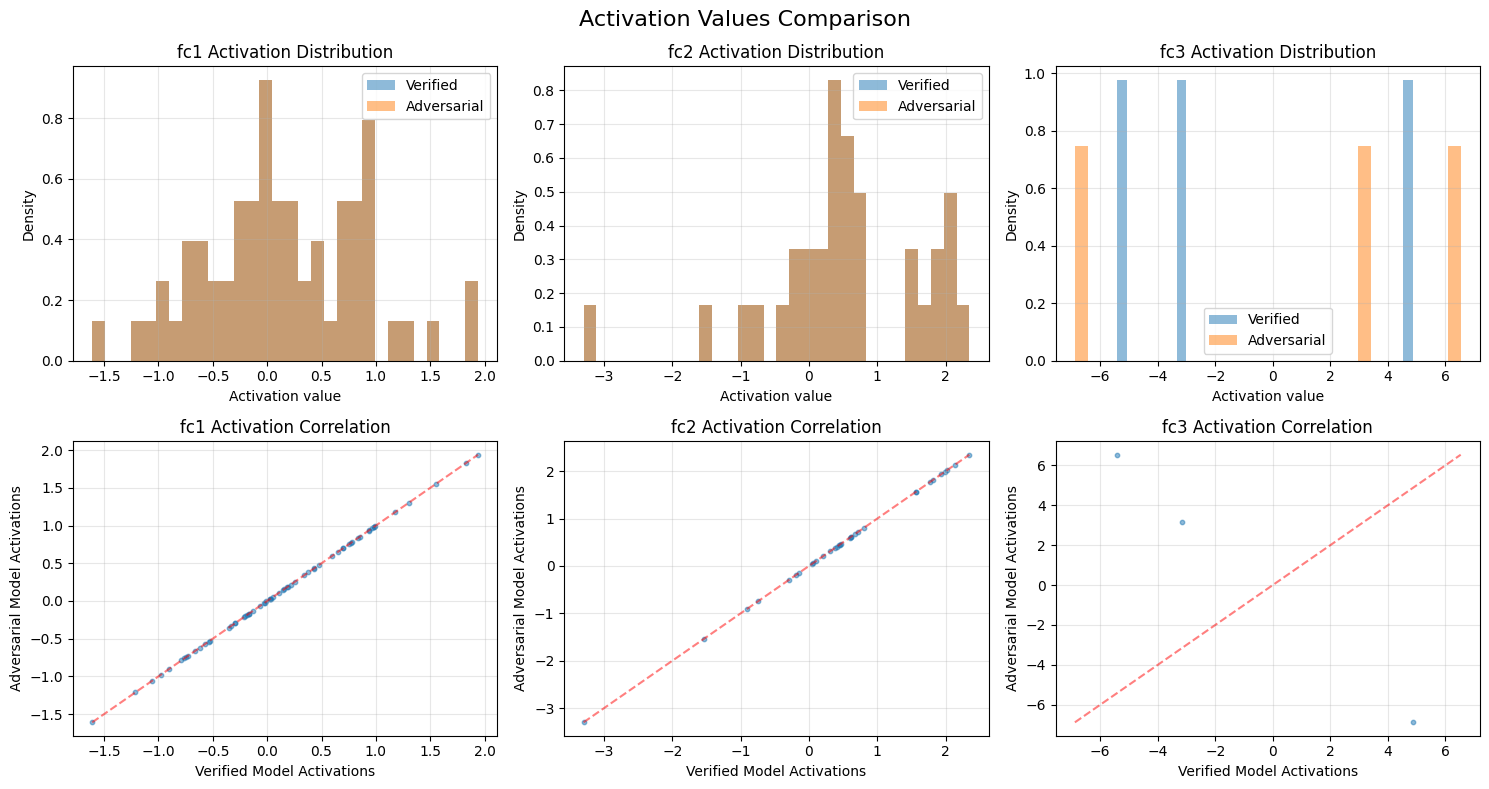

In [243]:
plot_weights_biases_comparison(verified_model, adv_model)

plot_activation_comparison(target_activations,adv_activations)